# Optimization Process

### Load cases, run once at each load case

It is suggested to run once with a specific load case you want to design and then just re run multiple times the cell below this one (the one where you change the thicknesses)

In [161]:
from variables import *
from wp4_2 import WingBox
from wp4_1 import InternalForces

# xflr_files = 'XFLRdata\\XFLR5sims'

# # change these
# aircraft_mass = 35688
# alt_sound_speed = 296.56

# internal_forces = InternalForces(aircraft_mass=aircraft_mass, load_factor= -1, sound_speed=alt_sound_speed, half_chord_sweep= hchord_sweep, fus_radius=fus_radius, density=rho0, airspeed= airspeed, 
#                                  c_r= c_r, wingspan= b, engine_z_loc= engine_z_loc, engine_length= engine_length, x_hl= x_hl, x_lemac= x_lemac, MAC= MAC, 
#                                  one_engine_thrust= one_engine_thrust, fan_cowl_diameter= fan_cowl_diameter, c_t= c_r*tr)
    
    
# shear_list, moment_list, torque_list, axial_list, g_shear, g_moment, g_torque, g_axial = internal_forces.force_diagrams(engine_mass=engine_mass, wing_box_length=wing_box_length, 
#                                         fuel_tank_length=fuel_tank_length, fuel_density=fuel_density)

# internal_forces.show(engine_mass=engine_mass, wing_box_length=wing_box_length, fuel_tank_length=fuel_tank_length, fuel_density=fuel_density)

In [ ]:
# Functions for the critical load cases are being saved here!!!!!!!
import pickle
"""
# Save all lists in a dictionary
all_lists = {"list1": shear_list, "list2": moment_list, "list3": torque_list, "list4": axial_list} # positive load factor

# Write to a file
with open("lists.pkl", "wb") as f:
    pickle.dump(all_lists, f)
    
"""

# negative_load_factor = {"list1": shear_list, "list2": moment_list, "list3": torque_list, "list4": axial_list}

# # Write to a file
# with open("lists_negative.pkl", "wb") as f:
#     pickle.dump(negative_load_factor, f)


In [163]:
from scipy.interpolate import interp1d
import numpy as np

# Functions for the critical load cases are being called here!!!!!!!
# with open("lists.pkl", "rb") as f:
#     loaded_lists = pickle.load(f)

# with open("lists_negative.pkl", "rb") as g:
#     negative_loaded_lists = pickle.load(g)

# z_points = np.linspace(0, 26.9 / 2, 1000)


# if LOADFACTOR > 0:
#     g_shear = interp1d(z_points, loaded_lists["list1"], kind='cubic', fill_value="extrapolate")
#     g_moment = interp1d(z_points, loaded_lists["list2"], kind='cubic', fill_value="extrapolate")
#     g_torque = interp1d(z_points, loaded_lists["list3"], kind='cubic', fill_value="extrapolate")
#     g_axial = interp1d(z_points, loaded_lists["list4"], kind='cubic', fill_value="extrapolate")
# elif LOADFACTOR < 0:
#     g_shear = interp1d(z_points, negative_loaded_lists["list1"], kind='cubic', fill_value="extrapolate")
#     g_moment = interp1d(z_points, negative_loaded_lists["list2"], kind='cubic', fill_value="extrapolate")
#     g_torque = interp1d(z_points, negative_loaded_lists["list3"], kind='cubic', fill_value="extrapolate")
#     g_axial = interp1d(z_points, negative_loaded_lists["list4"], kind='cubic', fill_value="extrapolate")
#     print(moment_list)
# else:
#     print("invalid input")

Now defining the wingbox, you can finally change the thicknesses here!

# Plotting

In [164]:
import matplotlib.pyplot as plt
import pandas as pd

In [165]:
design1 = pd.read_csv('deflections/option8-1.csv')
design2 = pd.read_csv('deflections/option5-1.csv')

design3 = pd.read_csv('deflections/option9-1.csv')

In [ ]:
plt.plot(design1['z location [m]'], design1['Area Moment of Inertia [mm^4]'], label='Design 1: I stringers')
plt.plot(design2['z location [m]'], design2['Area Moment of Inertia [mm^4]'], label='Design 2: I stringers')
plt.plot(design3['z location [m]'], design3['Area Moment of Inertia [mm^4]'], label='Design 3: L stringers')
plt.xlabel('Span wise position [m]')
plt.ylabel(r'Area moment of inertia [m$^4$]')
plt.grid()
plt.legend()
#plt.tight_layout()
plt.savefig('Areamomentofinertia.svg')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
wingspan_og = 26.9

plt.figure(figsize=(5, 5))
plt.plot(design1['z location [m]'], design1['Rotation [deg]'], label= 'Design 1')
plt.plot(design2['z location [m]'], design2['Rotation [deg]'], label= 'Design 2')
plt.plot(design3['z location [m]'], design3['Rotation [deg]'], label= 'Design 3')
plt.axhline(y = np.sign(design1['Rotation [deg]'].iloc[-1])*10, color = 'r', linestyle = '-', lw= 1, dashes=[2, 2], label='Max Allowed')
plt.xlabel("Span wise position [m]")
plt.ylabel("Wing tip rotation [deg]")
plt.ylim(-10.5, 0.5)
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('designs\\g-1rotation.svg')
plt.show()


In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(design1['z location [m]'], design1['Displacement [m]'], label='Design 1')
plt.plot(design2['z location [m]'], design2['Displacement [m]'], label='Design 2')
plt.plot(design3['z location [m]'], design3['Displacement [m]'], label='Design 3')

plt.axhline(y = np.sign(design1['Displacement [m]'].iloc[-1])*0.15*wingspan_og, color = 'r', linestyle = '-', lw= 1, dashes=[2, 2], label='Max Allowed')

plt.xlabel("Span wise position [m]")
plt.ylabel("Wing tip displacement [m]")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('designs\\g-1displacement.svg')
plt.show()

# Work Package 5

### Finally working on wp5, no need to run the previous cells, start running from here yay!

In [1]:
LOADFACTOR = 2.5

In [2]:
from scipy.interpolate import interp1d
import numpy as np
import pickle

# Functions for the critical load cases are being called here!!!!!!!
with open("lists.pkl", "rb") as f:
    loaded_lists = pickle.load(f)

with open("lists_negative.pkl", "rb") as g:
    negative_loaded_lists = pickle.load(g)

z_points = np.linspace(0, 26.9 / 2, 1000)


if LOADFACTOR > 0:
    g_shear = interp1d(z_points, loaded_lists["list1"], kind='cubic', fill_value="extrapolate")
    g_moment = interp1d(z_points, loaded_lists["list2"], kind='cubic', fill_value="extrapolate")
    g_torque = interp1d(z_points, loaded_lists["list3"], kind='cubic', fill_value="extrapolate")
    g_axial = interp1d(z_points, loaded_lists["list4"], kind='cubic', fill_value="extrapolate")
elif LOADFACTOR < 0:
    g_shear = interp1d(z_points, negative_loaded_lists["list1"], kind='cubic', fill_value="extrapolate")
    g_moment = interp1d(z_points, negative_loaded_lists["list2"], kind='cubic', fill_value="extrapolate")
    g_torque = interp1d(z_points, negative_loaded_lists["list3"], kind='cubic', fill_value="extrapolate")
    g_axial = interp1d(z_points, negative_loaded_lists["list4"], kind='cubic', fill_value="extrapolate")
    #print(moment_list)
else:
    print("invalid input")
    

In [3]:
from wp4_2 import WingBox
from variables import *

t_caps = 0.004
t_spar = 0.008
area_factor = 12
wingbox = WingBox(c_r= c_r, c_t = None, wingspan=b, area_factor_flanges=area_factor, 
                  intersection= intersection, tr= tr, t_spar= t_spar, t_caps= t_spar)

dimensions = {'base': 40e-3, 'height': 40e-3, 'thickness base': 3e-3, 'thickness height': 3e-3}
stringers = [20, 1, 'L', dimensions]
 
wingbox.show(wingbox.z, loads= [g_moment, g_torque], moduli= [E, G], stringers= stringers, limits=[0, 10], plot= False, degrees= True, 
             save=False, filename=None)
# if you wanna save the plot just set save=True and put some filename.png i.e. filename= 'thickness2.png'
area_stringer = dimensions['base']*dimensions['thickness base'] + dimensions['height']*dimensions['thickness height']

print(f'The steinerarea now is: {area_stringer} m2')

Wing span modified goes from 0 to 12.08
Max Tip Displacement OK Displacement = 2.301573636051115 8.556035821751358 (% Wingspan)
Wing Tip Max. Rotation Allowed Max displacement = 3.9868935720684218
The steinerarea now is: 0.00024 m2


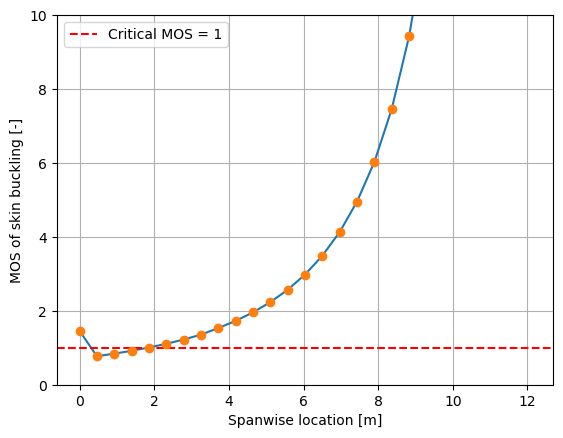

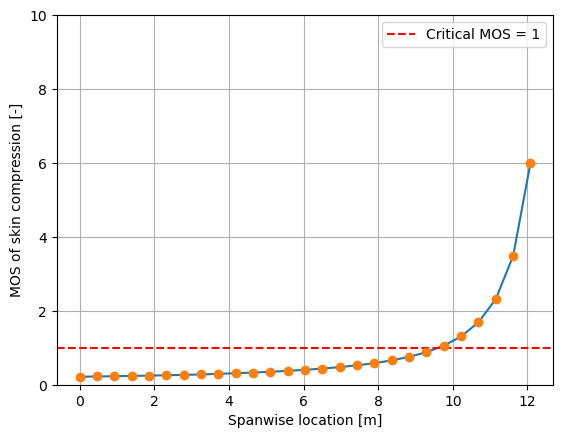

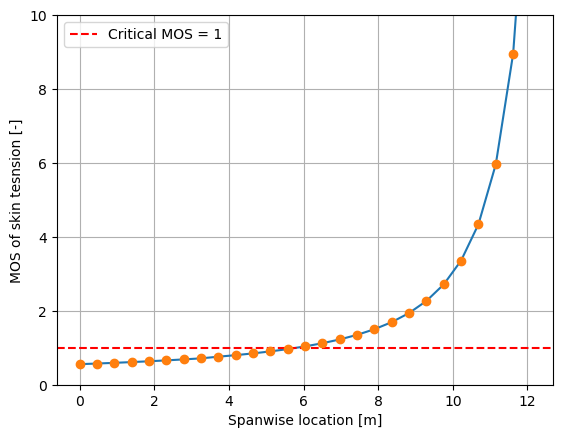

(array([0.11653275, 0.11344624, 0.11040237, 0.1073744 , 0.10435669,
        0.1013466 , 0.09834257, 0.09534356, 0.09234885, 0.08935789,
        0.08637026, 0.08338562, 0.0804037 , 0.07742426, 0.07444711,
        0.07147209, 0.06849906, 0.06552789, 0.06255846, 0.05959069,
        0.05662447, 0.05365974, 0.05069642, 0.04773445, 0.04477377,
        0.04181432, 0.03885605]),
 array([14.9683142 ,  7.32345361,  7.30425549,  7.30425549,  7.30425549,
         7.30425549,  7.30425549,  7.30425549,  7.30425549,  7.30425549,
         7.30425549,  7.30425549,  7.30425549,  7.30425549,  7.30425549,
         7.30425549,  7.30425549,  7.30425549,  7.30425549,  7.30425549,
         7.30425549,  7.30425549,  7.30425549,  7.30425549,  7.30425549,
         7.30425549,  7.30425549]))

<Figure size 640x480 with 0 Axes>

In [4]:
from wp5_1 import SkinBuckling, area_crosssection
n_ribs = 27
t_front = 0.001
t_rear = 0.003
skin = SkinBuckling(n_ribs=n_ribs, E = E, wingbox_geometry=wingbox.geometry, wingspan=wingbox.wingspan, v= 0.33, M = g_moment, N= g_axial, 
                    I_tot = wingbox.MOM_total, t_caps=t_caps, stringers= stringers, area=area_crosssection, chord= wingbox.chord, 
                    flange = area_factor, sigma_yield= tsY, compressive_yield = sigmaComp, t_front = t_front, t_rear = t_rear)
# if you want a ceiling in the graph so to see you actually surpass the 1 mos mark insert ceiling = True, 
# power value is used to concentrate the ribs more at the root
skin.show(ceiling = True, concentration=0)
skin.skin_Ks(concentration= 0.01)

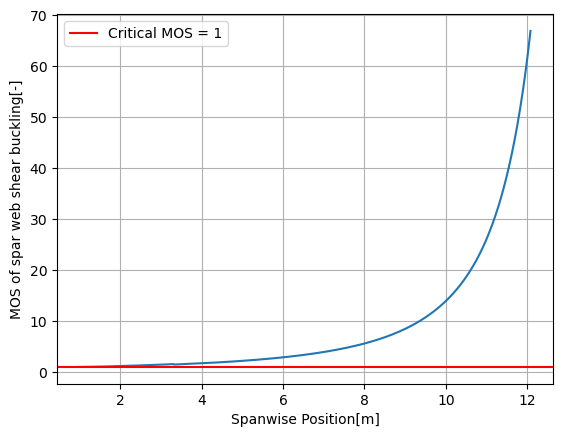

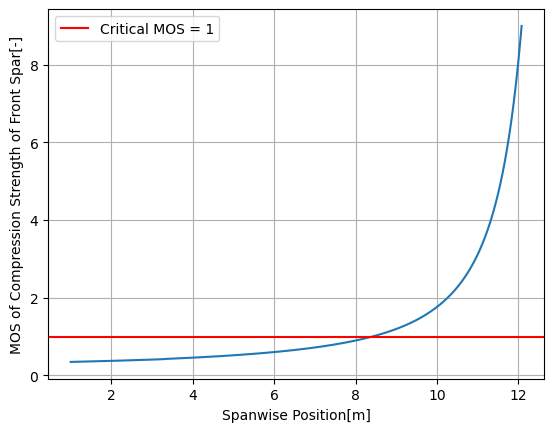

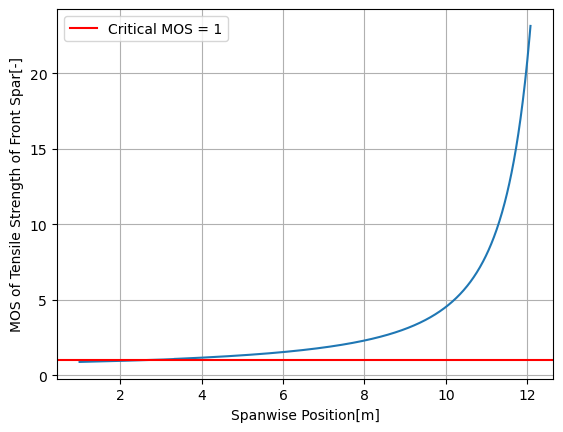

In [5]:
from wp5_1 import SparWebBuckling, area_crosssection
t_front = 7e-3
t_rear = 8e-3

spar = SparWebBuckling(wingbox_geometry=wingbox.geometry, wingspan=wingbox.wingspan, E= E, pois = 0.33, t_front= t_front, t_rear=t_rear, 
                       k_v= 1.5, I_tot=wingbox.MOM_total, sigmayield=tsY, sigmacomp= sigmaComp, area= area_crosssection, t_caps = t_caps, stringers=stringers, area_factor=area_factor, M = g_moment, N = g_axial)
spar.margin_of_safety(z=1, V= g_shear, T=g_torque)

spar.show_mos_buckling(V= g_shear, T= g_torque, choice = 'front')

spar.show_mos_normal(choice = 'front')

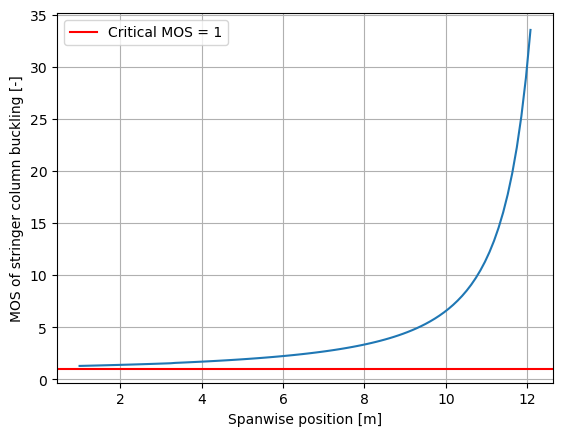

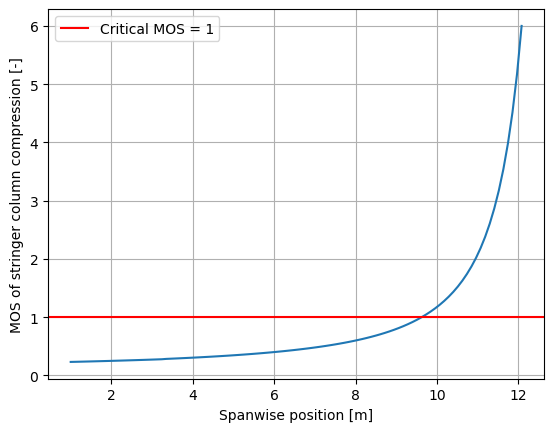

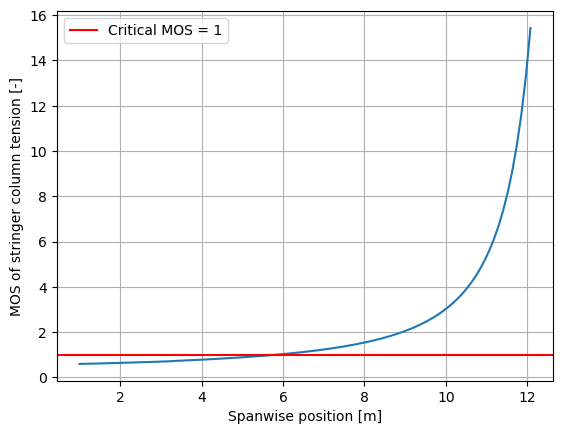

Applied Stress Array: [5.04352812e+08 5.00304293e+08 4.96239917e+08 4.92160183e+08
 4.88065551e+08 4.83956454e+08 4.79833311e+08 4.75696544e+08
 4.71546584e+08 4.67383882e+08 4.63208916e+08 4.59022187e+08
 4.54824222e+08 4.50615569e+08 4.46396788e+08 4.42168450e+08
 4.37931130e+08 4.33685405e+08 4.29431849e+08 4.25171037e+08
 4.20902856e+08 4.11687712e+08 4.06782962e+08 4.01898395e+08
 3.96992922e+08 3.92066666e+08 3.87119766e+08 3.82152379e+08
 3.77164684e+08 3.72156884e+08 3.67129205e+08 3.62081898e+08
 3.57015231e+08 3.51929489e+08 3.46824971e+08 3.41701982e+08
 3.36560834e+08 3.31401839e+08 3.26225308e+08 3.21031551e+08
 3.15820876e+08 3.10593594e+08 3.05350017e+08 3.00090471e+08
 2.94815293e+08 2.89524846e+08 2.84219521e+08 2.78899749e+08
 2.73566002e+08 2.68218805e+08 2.62858736e+08 2.57486435e+08
 2.52102600e+08 2.46707993e+08 2.41303434e+08 2.35889803e+08
 2.30468031e+08 2.25039103e+08 2.19604047e+08 2.14163939e+08
 2.08719892e+08 2.03273063e+08 1.97824653e+08 1.92375910e+08
 1

In [6]:
from wp5_1 import Stringer_bucklin

stringer = Stringer_bucklin(stringers=stringers, wingspan= wingbox.wingspan, M=g_moment, N=g_axial, I_tot=wingbox.MOM_total, area=area_crosssection, flange=area_factor,
                            t_caps=t_caps, t_front=t_front, t_rear = t_rear, chord= wingbox.chord, geometry= wingbox.geometry, n_ribs=n_ribs, compressive_yield=sigmaComp,
                            tensile_yield=tsY)

stringer.graph_buckling_values(E=E)
stringer.MOS_buckling_values(E=E, stringers=stringers)